In [58]:
%matplotlib inline
%pylab inline
import matplotlib
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal

Populating the interactive namespace from numpy and matplotlib


In [73]:
# transrate scores
file_macmanes_transrate_scores = "~/Downloads/transrate_scores_macmanes.csv"
file_dib_transrate_scores = "~/Downloads/transrate_scores_dib.csv"
macmanes_transrate_score = pd.read_csv(file_macmanes_transrate_scores, index_col='SampleName')
dib_transrate_score = pd.read_csv(file_dib_transrate_scores, index_col='SampleName')

In [74]:
# reference transrate metrics
file_dib_v_macmanes_transrate = "~/Downloads/transrate_reference_dib_v_macmanes.csv"
file_macmanes_v_dib_transrate = "~/Downloads/transrate_reverse_ref_macmanes_v_dib.csv"
macmanes_transrate = pd.read_csv(file_dib_v_macmanes_transrate, index_col='SampleName')
dib_transrate = pd.read_csv(file_macmanes_v_dib_transrate, index_col='SampleName')

In [61]:
dib_transrate_score = dib_transrate_score.drop_duplicates()
macmanes_transrate_score = macmanes_transrate_score.drop_duplicates()

In [54]:
print(dib_transrate_score.index)

Index([u'DRR053698', u'ERR489297', u'DRR030368', u'DRR031870', u'DRR046632',
       u'DRR069093', u'ERR058009', u'ERR1016675', u'SRR2086412',
       u'SRR1789336'],
      dtype='object', name=u'SampleName')


In [55]:
print(macmanes_transrate_score.index)

Index([u'DRR053698', u'DRR082659', u'ERR489297', u'DRR031870', u'DRR046632',
       u'DRR069093', u'ERR058009', u'ERR1016675', u'SRR2086412', u'SRR3499127',
       u'SRR1789336', u'SRR2016923', u'ERR1674585'],
      dtype='object', name=u'SampleName')


In [56]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate_score.index)
ncnc=set(macmanes_transrate_score.index)
len(ddd.intersection(ncnc))

9

In [66]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate.index)
ncnc=set(macmanes_transrate.index)
len(ddd.intersection(ncnc))

11

In [84]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='gray', color2='blue', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.80, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
    ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    return newdf, fig, ax

def violin_split(df, col1, col2, fig, ax, color2='gray', color1='blue', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    ax.set_axis_bgcolor('white')
    
def create_plots(df1, df2, column, col_title, df1name = 'macmanes', df2name = 'dib', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(8,8)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

/Users/cohenl06/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:27: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/cohenl06/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:54: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


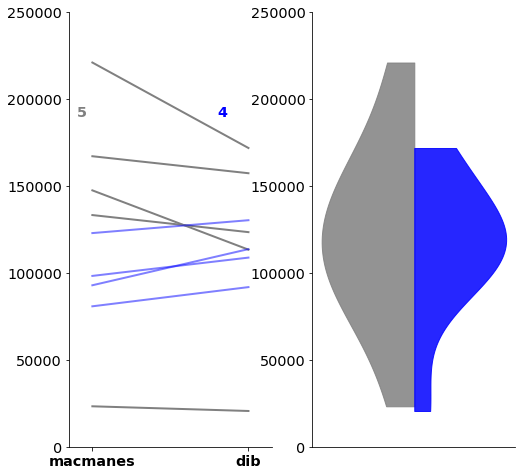

In [85]:
score,fig, ax = create_plots(macmanes_transrate_score,dib_transrate_score, 'n_seqs', '',ymax=250000, ypos=190000)

In [86]:
dib_transrate_score["n_seqs"].mean()

111007.5

In [34]:
macmanes_transrate_score["n_seqs"].mean()

206011.07692307694

In [87]:
macmanes_transrate_score.columns

Index([u'assembly', u'n_seqs', u'smallest', u'largest', u'n_bases',
       u'mean_len', u'n_under_200', u'n_over_1k', u'n_over_10k', u'n_with_orf',
       u'mean_orf_percent', u'n90', u'n70', u'n50', u'n30', u'n10', u'gc',
       u'gc_skew', u'at_skew', u'cpg_ratio', u'bases_n', u'proportion_n',
       u'linguistic_complexity', u'fragments', u'fragments_mapped',
       u'p_fragments_mapped', u'good_mappings', u'p_good_mapping',
       u'bad_mappings', u'potential_bridges', u'bases_uncovered',
       u'p_bases_uncovered', u'contigs_uncovbase', u'p_contigs_uncovbase',
       u'contigs_uncovered', u'p_contigs_uncovered', u'contigs_lowcovered',
       u'p_contigs_lowcovered', u'contigs_segmented', u'p_contigs_segmented',
       u'score', u'optimal_score', u'cutoff'],
      dtype='object')

In [88]:
macmanes_transrate.columns

Index([u'assembly', u'n_seqs', u'smallest', u'largest', u'n_bases',
       u'mean_len', u'n_under_200', u'n_over_1k', u'n_over_10k', u'n_with_orf',
       u'mean_orf_percent', u'n90', u'n70', u'n50', u'n30', u'n10', u'gc',
       u'gc_skew', u'at_skew', u'cpg_ratio', u'bases_n', u'proportion_n',
       u'linguistic_complexity', u'CRBB_hits', u'n_contigs_with_CRBB',
       u'p_contigs_with_CRBB', u'rbh_per_reference', u'n_refs_with_CRBB',
       u'p_refs_with_CRBB', u'cov25', u'p_cov25', u'cov50', u'p_cov50',
       u'cov75', u'p_cov75', u'cov85', u'p_cov85', u'cov95', u'p_cov95',
       u'reference_coverage', u'score', u'optimal_score', u'cutoff', u'Run'],
      dtype='object')

In [81]:
dib_transrate.columns

Index([u'assembly', u'n_seqs', u'smallest', u'largest', u'n_bases',
       u'mean_len', u'n_under_200', u'n_over_1k', u'n_over_10k', u'n_with_orf',
       u'mean_orf_percent', u'n90', u'n70', u'n50', u'n30', u'n10', u'gc',
       u'gc_skew', u'at_skew', u'cpg_ratio', u'bases_n', u'proportion_n',
       u'linguistic_complexity', u'CRBB_hits', u'n_contigs_with_CRBB',
       u'p_contigs_with_CRBB', u'rbh_per_reference', u'n_refs_with_CRBB',
       u'p_refs_with_CRBB', u'cov25', u'p_cov25', u'cov50', u'p_cov50',
       u'cov75', u'p_cov75', u'cov85', u'p_cov85', u'cov95', u'p_cov95',
       u'reference_coverage', u'score', u'optimal_score', u'cutoff', u'Run'],
      dtype='object')

/Users/cohenl06/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:27: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/cohenl06/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:54: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


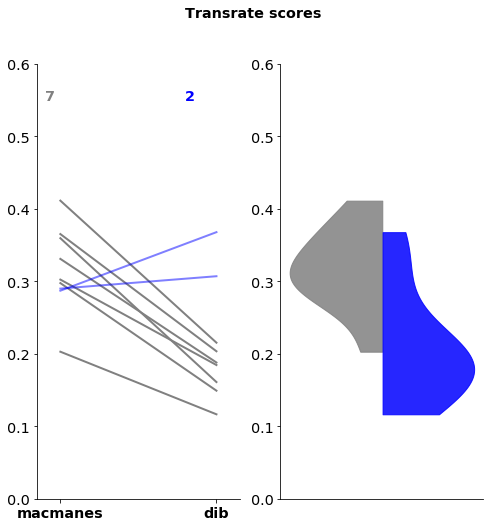

In [83]:
score,fig, ax = create_plots(macmanes_transrate_score,dib_transrate_score, 'score', 'Transrate scores',ymax=0.6, ypos=0.55)

In [49]:
score[score['macmanes']<score['dib']]

,macmanes,dib
SampleName,,
SRR2086412,0.28712,0.36789
SRR1789336,0.29000,0.30709


In [57]:
score

,macmanes,dib
SampleName,,
DRR053698,0.36526,0.20354
ERR489297,0.30244,0.18458
DRR031870,0.33101,0.18805
DRR046632,0.29762,0.14917
DRR069093,0.20294,0.11658
ERR058009,0.35955,0.16107
ERR1016675,0.41138,0.21540
SRR2086412,0.28712,0.36789
SRR1789336,0.29000,0.30709


/Users/cohenl06/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:27: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/cohenl06/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:54: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


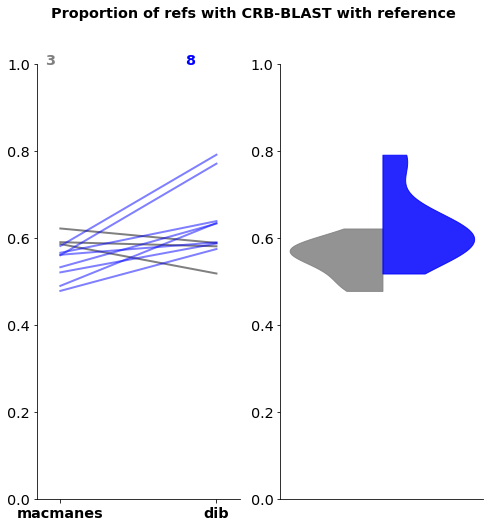

In [102]:
p_refs,fig, ax = create_plots(macmanes_transrate,dib_transrate, 'p_refs_with_CRBB', 'Proportion of refs with CRB-BLAST with reference',ymax=1, ypos=1)




In [107]:
dib_transrate_score.score

SampleName
DRR053698     0.20354
ERR489297     0.18458
DRR030368     0.16011
DRR031870     0.18805
DRR046632     0.14917
DRR069093     0.11658
ERR058009     0.16107
ERR1016675    0.21540
SRR2086412    0.36789
SRR1789336    0.30709
Name: score, dtype: float64

In [106]:
macmanes_transrate_score.score

SampleName
DRR053698     0.36526
DRR082659     0.29540
ERR489297     0.30244
DRR031870     0.33101
DRR046632     0.29762
DRR069093     0.20294
ERR058009     0.35955
ERR1016675    0.41138
SRR2086412    0.28712
SRR3499127    0.12390
SRR1789336    0.29000
SRR2016923    0.12782
ERR1674585    0.27591
Name: score, dtype: float64

In [109]:
dib_transrate_score.mean_orf_percent

SampleName
DRR053698     55.00986
ERR489297     51.82306
DRR030368     56.81875
DRR031870     62.52451
DRR046632     59.13064
DRR069093     61.14864
ERR058009     71.86366
ERR1016675    55.35279
SRR2086412    42.62858
SRR1789336    57.88362
Name: mean_orf_percent, dtype: float64

In [110]:
macmanes_transrate_score.mean_orf_percent

SampleName
DRR053698     58.70080
DRR082659     59.23221
ERR489297     55.46774
DRR031870     66.63618
DRR046632     60.94481
DRR069093     63.25495
ERR058009     77.43386
ERR1016675    69.88026
SRR2086412    46.30276
SRR3499127    53.33971
SRR1789336    61.90091
SRR2016923    57.40076
ERR1674585    51.02618
Name: mean_orf_percent, dtype: float64